# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load and Prepare the Dataset

In [4]:
df = pd.read_csv("Data\\breast-cancer.csv")

# Drop ID column if present
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Encode target variable (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tree-Based Models

### 1. Decision Tree

In [6]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

### 2. Random Forest

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

### 3. Gradient Boosting

In [8]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

# K-Nearest Neighbors (KNN)

### 1. Feature Scaling

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2. Test Multiple k Values (1–20)

In [10]:
k_values = range(1, 21)
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_test_scaled)
    knn_accuracies.append(accuracy_score(y_test, preds))

### 3. Plot Accuracy vs k

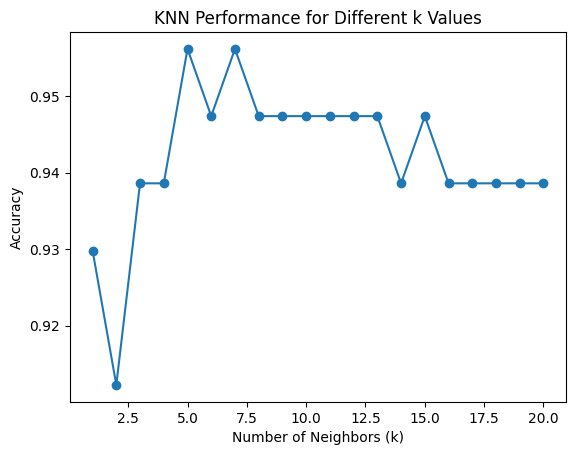

In [11]:
plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Performance for Different k Values")
plt.show()

### 4. Optimal k

In [12]:
optimal_k = k_values[np.argmax(knn_accuracies)]
print("Optimal k:", optimal_k)

Optimal k: 5


### 5. Train Final KNN Model

In [13]:
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)
knn_pred = knn_final.predict(X_test_scaled)

# Evaluation Function

In [14]:
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

# Evaluate All Models

In [15]:
results = {
    "Decision Tree": evaluate_model(y_test, dt_pred),
    "Random Forest": evaluate_model(y_test, rf_pred),
    "Gradient Boosting": evaluate_model(y_test, gb_pred),
    "KNN": evaluate_model(y_test, knn_pred)
}

results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1-score
Decision Tree,0.929825,0.904762,0.904762,0.904762
Random Forest,0.973684,1.000000,0.928571,0.962963
Gradient Boosting,0.964912,1.000000,0.904762,0.950000
KNN,0.956140,0.974359,0.904762,0.938272
